In [1]:
import numpy as np


Processing 10000_events_simset_1600_seed_1000_20250516_112519.parquet...
Loaded 10000 events
Found 7601 CC events and 2399 NC events

Processing 10000_events_simset_1601_seed_1001_20250516_112659.parquet...
Loaded 10000 events
Found 7517 CC events and 2483 NC events

Processing 10000_events_simset_1602_seed_1002_20250516_112840.parquet...
Loaded 10000 events
Found 7522 CC events and 2478 NC events

Processing 10000_events_simset_1603_seed_1003_20250516_112857.parquet...
Loaded 10000 events
Found 7497 CC events and 2503 NC events

Processing 10000_events_simset_1604_seed_1004_20250516_112923.parquet...
Loaded 10000 events
Found 7535 CC events and 2465 NC events

Processing 10000_events_simset_1605_seed_1005_20250516_112950.parquet...
Loaded 10000 events
Found 7417 CC events and 2583 NC events

Creating combined histograms...
Total CC events: 45089
Total NC events: 14911

Combined Statistics:
CC Events (45089 events):
  Mean hits: 19.66
  Median hits: 16.00
  Mean unique DOMs: 16.24
  M

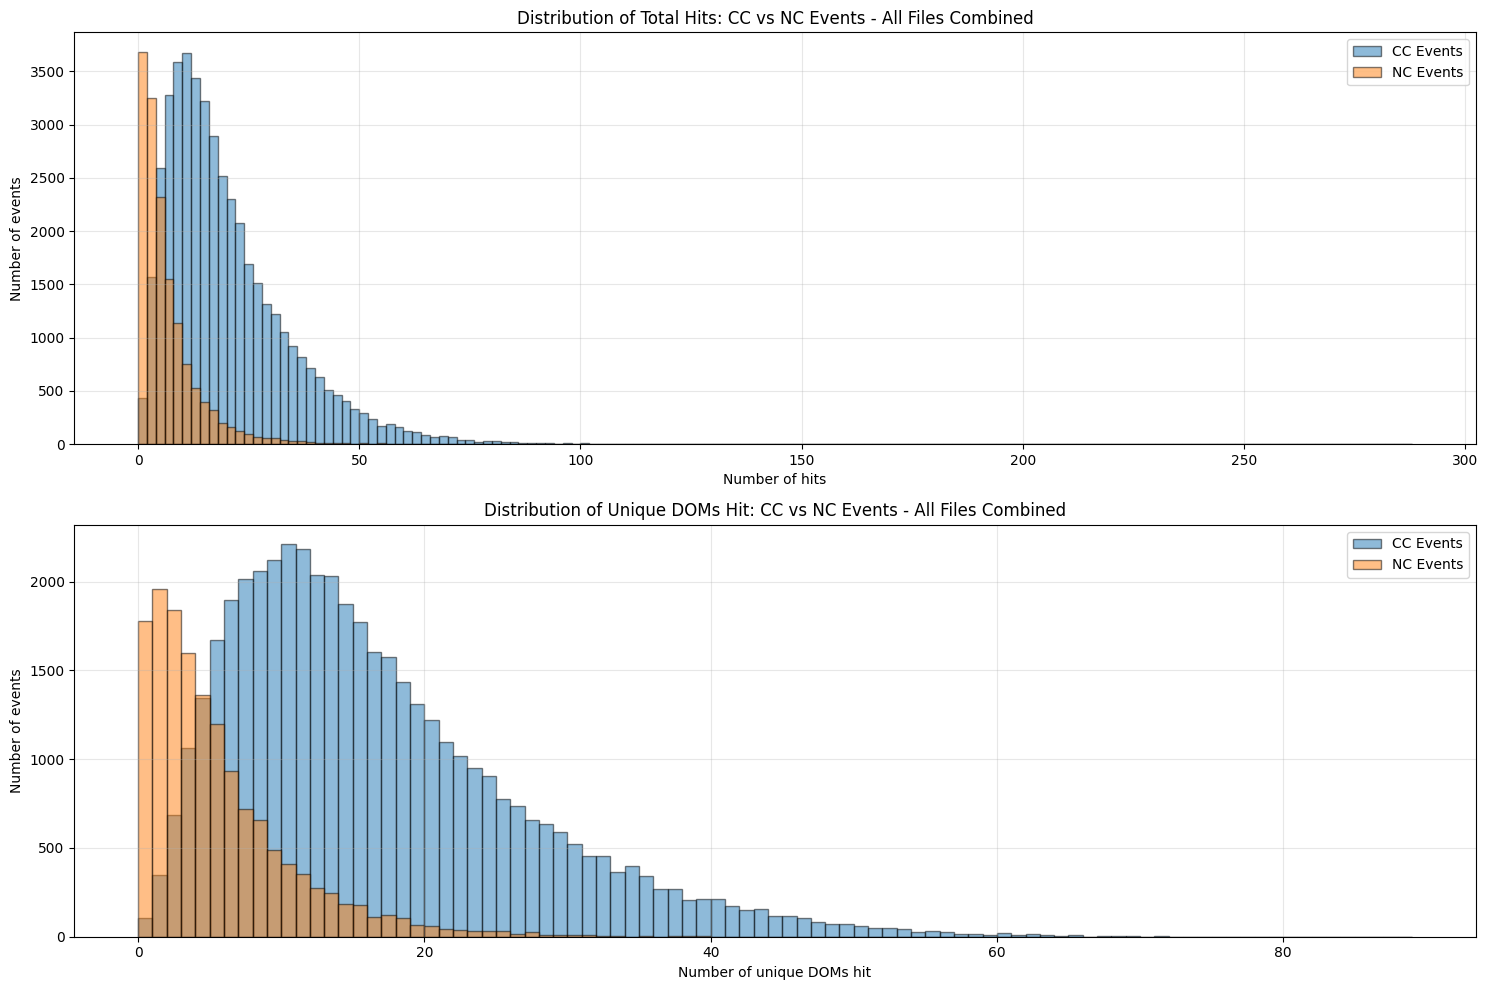

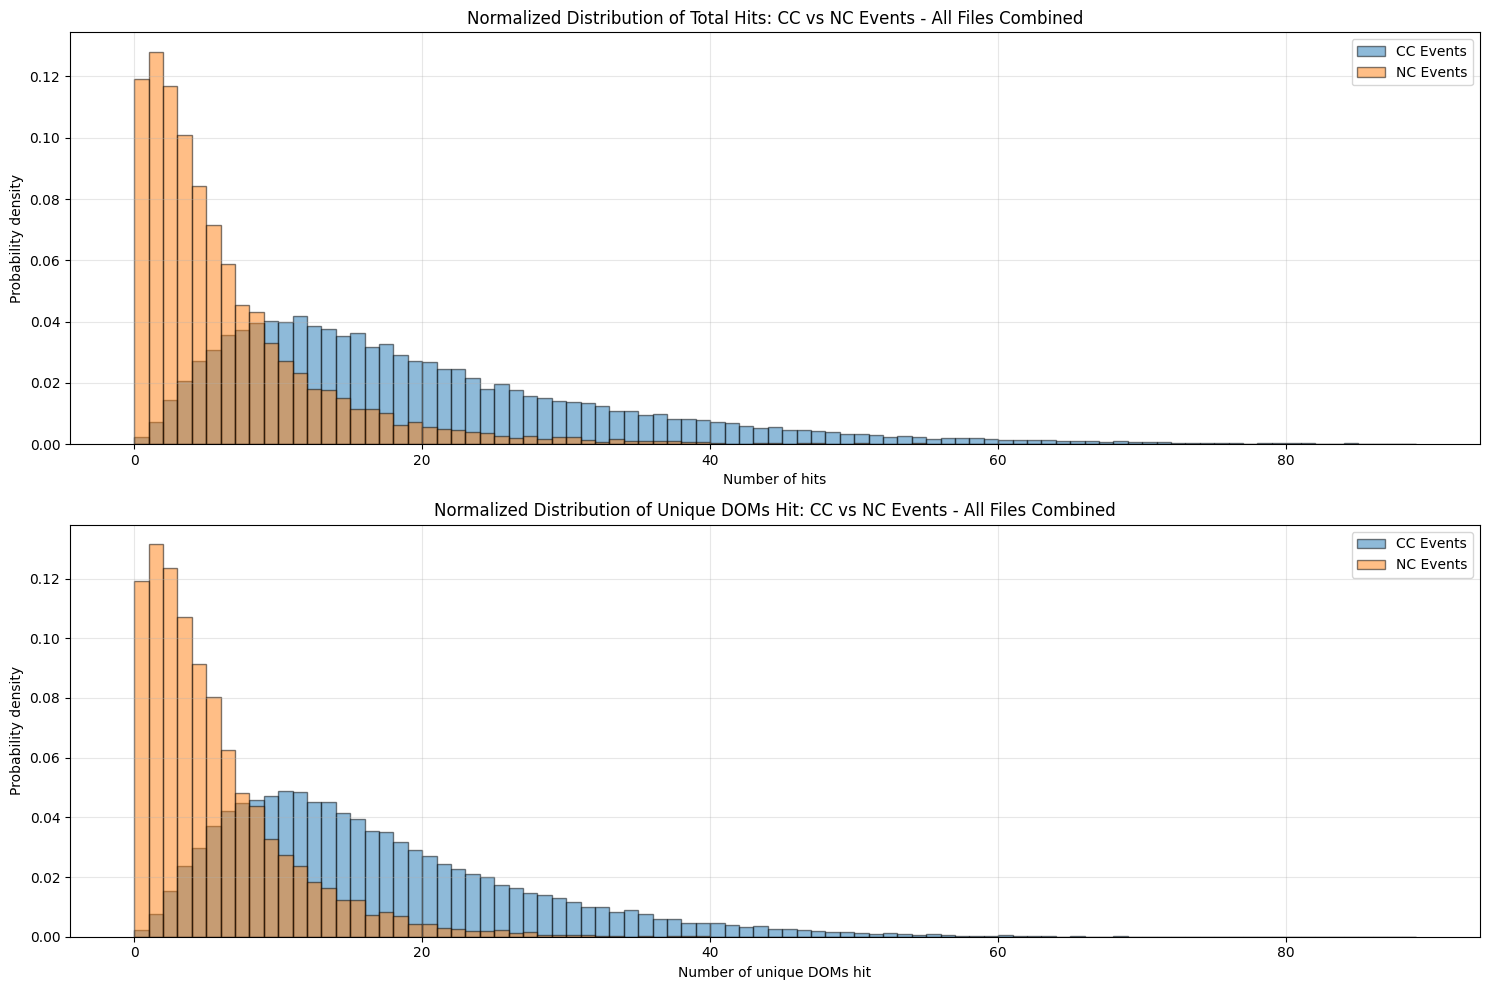

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Directory containing your files
data_dir = "output/"

# List of simulation output files
sim_files = [
    "10000_events_simset_1600_seed_1000_20250516_112519.parquet",
    "10000_events_simset_1601_seed_1001_20250516_112659.parquet",
    "10000_events_simset_1602_seed_1002_20250516_112840.parquet",
    "10000_events_simset_1603_seed_1003_20250516_112857.parquet",
    "10000_events_simset_1604_seed_1004_20250516_112923.parquet",
    "10000_events_simset_1605_seed_1005_20250516_112950.parquet"
]

# Lists to collect data from all files
all_cc_hits = []
all_nc_hits = []
all_cc_unique_doms = []
all_nc_unique_doms = []

# Process each file
for sim_file in sim_files:
    file_path = os.path.join(data_dir, sim_file)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    
    print(f"\nProcessing {sim_file}...")
    
    # Load the file
    df = pd.read_parquet(file_path)
    print(f"Loaded {len(df)} events")
    
    # Get CC and NC events
    nc_idx = []
    cc_idx = []
    
    for i, (idx, row) in enumerate(df.iterrows()):
        if row['mc_truth']['interaction'] == 1:
            cc_idx.append(idx)
        else:
            nc_idx.append(idx)
    
    print(f"Found {len(cc_idx)} CC events and {len(nc_idx)} NC events")
    
    # Arrays to store total hit counts for CC and NC events
    cc_hits_per_event = np.zeros(len(cc_idx))
    nc_hits_per_event = np.zeros(len(nc_idx))
    
    # Arrays to store unique DOM hit counts
    cc_unique_doms_per_event = np.zeros(len(cc_idx))
    nc_unique_doms_per_event = np.zeros(len(nc_idx))
    
    # Process CC events
    for i, event_idx in enumerate(cc_idx):
        # Get photons data
        photons = df.iloc[event_idx]['photons']
        
        # Count total hits
        cc_hits_per_event[i] = len(photons['t'])
        
        # Count unique DOMs hit
        string_ids = photons['string_id']
        sensor_ids = photons['sensor_id']
        cc_unique_doms_per_event[i] = len(set(zip(string_ids, sensor_ids)))
    
    # Process NC events
    for i, event_idx in enumerate(nc_idx):
        # Get photons data
        photons = df.iloc[event_idx]['photons']
        
        # Count total hits
        nc_hits_per_event[i] = len(photons['t'])
        
        # Count unique DOMs hit
        string_ids = photons['string_id']
        sensor_ids = photons['sensor_id']
        nc_unique_doms_per_event[i] = len(set(zip(string_ids, sensor_ids)))
    
    # Add to combined lists
    all_cc_hits.extend(cc_hits_per_event)
    all_nc_hits.extend(nc_hits_per_event)
    all_cc_unique_doms.extend(cc_unique_doms_per_event)
    all_nc_unique_doms.extend(nc_unique_doms_per_event)

# Convert to numpy arrays
all_cc_hits = np.array(all_cc_hits)
all_nc_hits = np.array(all_nc_hits)
all_cc_unique_doms = np.array(all_cc_unique_doms)
all_nc_unique_doms = np.array(all_nc_unique_doms)

print("\nCreating combined histograms...")
print(f"Total CC events: {len(all_cc_hits)}")
print(f"Total NC events: {len(all_nc_hits)}")

# Create histograms for combined data
plt.figure(figsize=(15, 10))

# Plot 1: Total hits distribution
plt.subplot(2, 1, 1)
max_hits = max(np.max(all_cc_hits), np.max(all_nc_hits))
bins = np.arange(0, max_hits + 10, 2)  # Adjust bin size as needed

plt.hist(all_cc_hits, bins=bins, alpha=0.5, label='CC Events', edgecolor='black')
plt.hist(all_nc_hits, bins=bins, alpha=0.5, label='NC Events', edgecolor='black')
plt.xlabel('Number of hits')
plt.ylabel('Number of events')
plt.title('Distribution of Total Hits: CC vs NC Events - All Files Combined')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Unique DOMs hit distribution
plt.subplot(2, 1, 2)
max_doms = max(np.max(all_cc_unique_doms), np.max(all_nc_unique_doms))
bins = np.arange(0, max_doms + 5, 1)  # Adjust bin size as needed

plt.hist(all_cc_unique_doms, bins=bins, alpha=0.5, label='CC Events', edgecolor='black')
plt.hist(all_nc_unique_doms, bins=bins, alpha=0.5, label='NC Events', edgecolor='black')
plt.xlabel('Number of unique DOMs hit')
plt.ylabel('Number of events')
plt.title('Distribution of Unique DOMs Hit: CC vs NC Events - All Files Combined')
plt.legend()
plt.grid(alpha=0.3)

# Print combined statistics
print(f"\nCombined Statistics:")
print(f"CC Events ({len(all_cc_hits)} events):")
print(f"  Mean hits: {np.mean(all_cc_hits):.2f}")
print(f"  Median hits: {np.median(all_cc_hits):.2f}")
print(f"  Mean unique DOMs: {np.mean(all_cc_unique_doms):.2f}")
print(f"  Median unique DOMs: {np.median(all_cc_unique_doms):.2f}")

print(f"\nNC Events ({len(all_nc_hits)} events):")
print(f"  Mean hits: {np.mean(all_nc_hits):.2f}")
print(f"  Median hits: {np.median(all_nc_hits):.2f}")
print(f"  Mean unique DOMs: {np.mean(all_nc_unique_doms):.2f}")
print(f"  Median unique DOMs: {np.median(all_nc_unique_doms):.2f}")

plt.tight_layout()
plt.show()

# Normalized histograms for combined data
plt.figure(figsize=(15, 10))

# Plot 1: Normalized total hits distribution
plt.subplot(2, 1, 1)
plt.hist(all_cc_hits, bins=bins, alpha=0.5, label='CC Events', 
         edgecolor='black', density=True)
plt.hist(all_nc_hits, bins=bins, alpha=0.5, label='NC Events', 
         edgecolor='black', density=True)
plt.xlabel('Number of hits')
plt.ylabel('Probability density')
plt.title('Normalized Distribution of Total Hits: CC vs NC Events - All Files Combined')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Normalized unique DOMs hit distribution
plt.subplot(2, 1, 2)
plt.hist(all_cc_unique_doms, bins=bins, alpha=0.5, label='CC Events', 
         edgecolor='black', density=True)
plt.hist(all_nc_unique_doms, bins=bins, alpha=0.5, label='NC Events', 
         edgecolor='black', density=True)
plt.xlabel('Number of unique DOMs hit')
plt.ylabel('Probability density')
plt.title('Normalized Distribution of Unique DOMs Hit: CC vs NC Events - All Files Combined')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Processing 10000_events_simset_1600_seed_1000_20250516_112519.parquet...
Loaded 10000 events
Processing event 0/10000...
Processing event 1000/10000...
Processing event 2000/10000...
Processing event 3000/10000...
Processing event 4000/10000...
Processing event 5000/10000...
Processing event 6000/10000...
Processing event 7000/10000...
Processing event 8000/10000...
Processing event 9000/10000...
Extracted features for 9713 events
Class balance: 7585 CC events (78.1%), 2128 NC events (21.9%)
Training set: 6799 events, Test set: 2914 events
Training BDT classifier...

Model Evaluation:
Accuracy: 0.8308
Precision: 0.8643
Recall: 0.9293
F1 Score: 0.8956


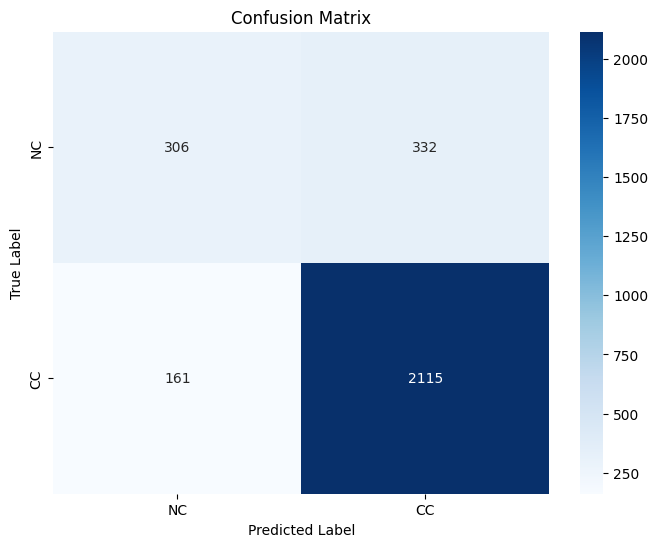

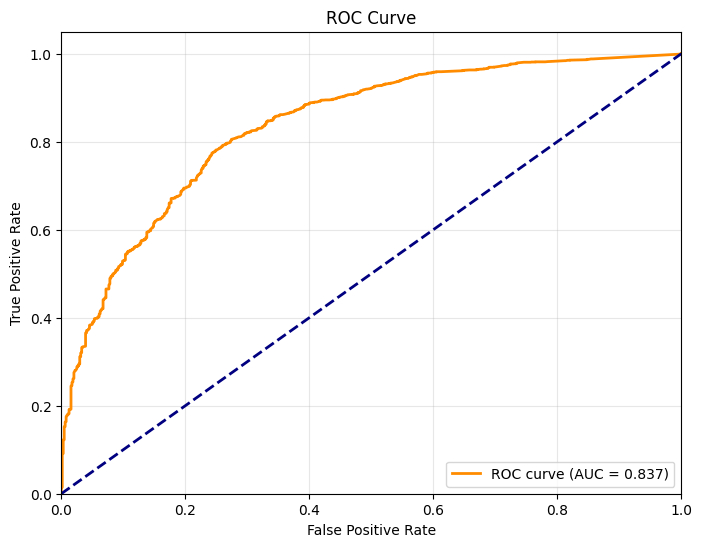

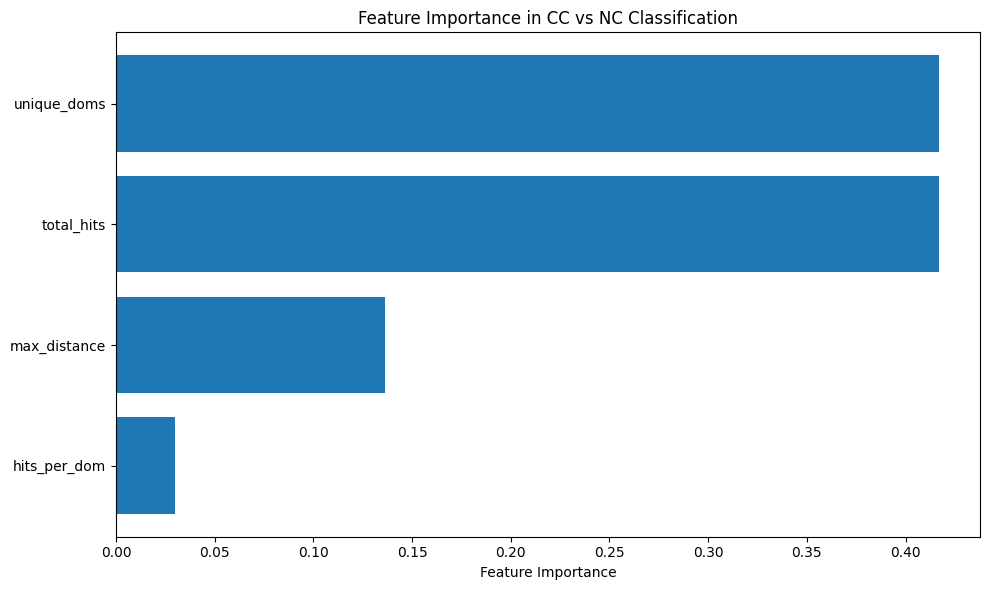

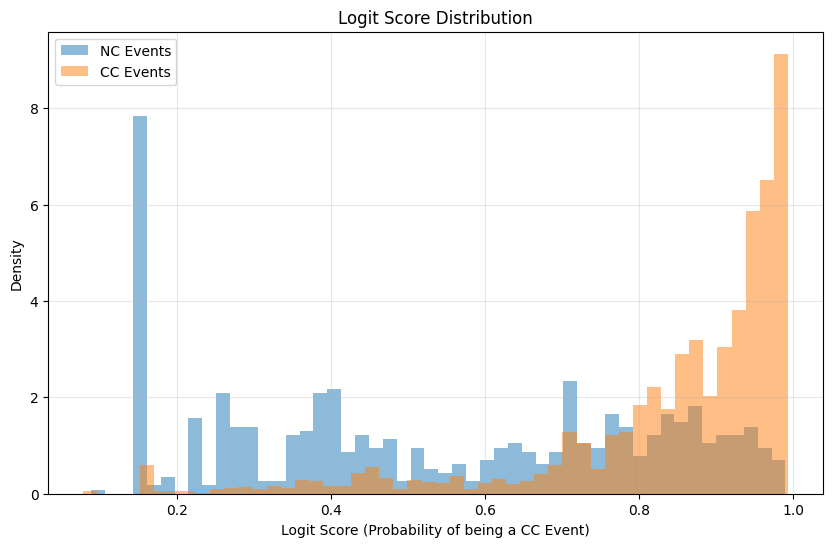


Optimal classification threshold: 0.7868
At this threshold - True Positive Rate: 0.7812, False Positive Rate: 0.2492
Precision at optimal threshold: 0.9179


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_curve, auc, confusion_matrix)
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Directory containing your files
data_dir = "output/"

# Just use one file to start
sim_file = "10000_events_simset_1600_seed_1000_20250516_112519.parquet"
file_path = os.path.join(data_dir, sim_file)

print(f"Processing {sim_file}...")

# Load the file
df = pd.read_parquet(file_path)
print(f"Loaded {len(df)} events")

# Function to extract event-level features
def extract_event_features(event_data):
    try:
        # Get interaction type (1 for CC, 2 for NC)
        interaction_type = event_data['mc_truth']['interaction']
        
        # Label: 1 for CC, 0 for NC
        label = 1 if interaction_type == 1 else 0
        
        # Get photon data
        photons = event_data['photons']
        
        # Skip events with no hits
        if len(photons['t']) == 0:
            return None
        
        # Basic features
        total_hits = len(photons['t'])
        string_ids = photons['string_id']
        sensor_ids = photons['sensor_id']
        unique_doms = len(set(zip(string_ids, sensor_ids)))
        
        # Calculate maximum distance between any two hit DOMs
        pos_x = photons['sensor_pos_x']
        pos_y = photons['sensor_pos_y']
        pos_z = photons['sensor_pos_z']
        positions = np.vstack((pos_x, pos_y, pos_z)).T
        max_distance = 0
        if len(positions) > 1:
            from scipy.spatial.distance import pdist
            max_distance = np.max(pdist(positions))
        
        # Simplified feature set
        features = {
            'total_hits': total_hits,
            'unique_doms': unique_doms,
            'max_distance': max_distance,
            'hits_per_dom': total_hits / max(1, unique_doms),
            'label': label
        }
        
        return features
    except Exception as e:
        print(f"Error extracting features: {e}")
        return None

# Extract features from all events
event_features = []
for i, (idx, event_data) in enumerate(df.iterrows()):
    if i % 1000 == 0:  # Progress update
        print(f"Processing event {i}/{len(df)}...")
    
    features = extract_event_features(event_data)
    if features is not None:
        event_features.append(features)

print(f"Extracted features for {len(event_features)} events")

# Convert to DataFrame
features_df = pd.DataFrame(event_features)

# Check class balance
cc_count = sum(features_df['label'] == 1)
nc_count = sum(features_df['label'] == 0)
print(f"Class balance: {cc_count} CC events ({cc_count/len(features_df)*100:.1f}%), {nc_count} NC events ({nc_count/len(features_df)*100:.1f}%)")

# Prepare features and target for BDT
X = features_df.drop('label', axis=1)
y = features_df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set: {X_train.shape[0]} events, Test set: {X_test.shape[0]} events")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the BDT
print("Training BDT classifier...")
bdt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

bdt.fit(X_train_scaled, y_train)

# Make predictions
y_pred = bdt.predict(X_test_scaled)
y_prob = bdt.predict_proba(X_test_scaled)[:, 1]  # Probability of being CC

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['NC', 'CC'], yticklabels=['NC', 'CC'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
feature_importance = bdt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in CC vs NC Classification')
plt.tight_layout()
plt.show()

# Logit score distribution
plt.figure(figsize=(10, 6))
plt.hist(y_prob[y_test == 0], bins=50, alpha=0.5, label='NC Events', density=True)
plt.hist(y_prob[y_test == 1], bins=50, alpha=0.5, label='CC Events', density=True)
plt.xlabel('Logit Score (Probability of being a CC Event)')
plt.ylabel('Density')
plt.title('Logit Score Distribution')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Find optimal threshold - fixed issue
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal classification threshold: {optimal_threshold:.4f}")
print(f"At this threshold - True Positive Rate: {tpr[optimal_idx]:.4f}, False Positive Rate: {fpr[optimal_idx]:.4f}")

# Calculate precision at threshold properly
# The error was in trying to apply thresholds to y_prob
precision_at_threshold = precision_score(y_test, y_prob >= optimal_threshold)
print(f"Precision at optimal threshold: {precision_at_threshold:.4f}")


Processing 10000_events_simset_1600_seed_1000_20250516_112519.parquet...
Loaded 10000 events
File contains 7601 CC events and 2399 NC events
Processing event 0/10000...
Processing event 1000/10000...
Processing event 2000/10000...
Processing event 3000/10000...
Processing event 4000/10000...
Processing event 5000/10000...
Processing event 6000/10000...
Processing event 7000/10000...
Processing event 8000/10000...
Processing event 9000/10000...
Extracted features for 9713 events from 10000_events_simset_1600_seed_1000_20250516_112519.parquet

Processing 10000_events_simset_1601_seed_1001_20250516_112659.parquet...
Loaded 10000 events
File contains 7517 CC events and 2483 NC events
Processing event 0/10000...
Processing event 1000/10000...
Processing event 2000/10000...
Processing event 3000/10000...
Processing event 4000/10000...
Processing event 5000/10000...
Processing event 6000/10000...
Processing event 7000/10000...
Processing event 8000/10000...
Processing event 9000/10000...
Ext

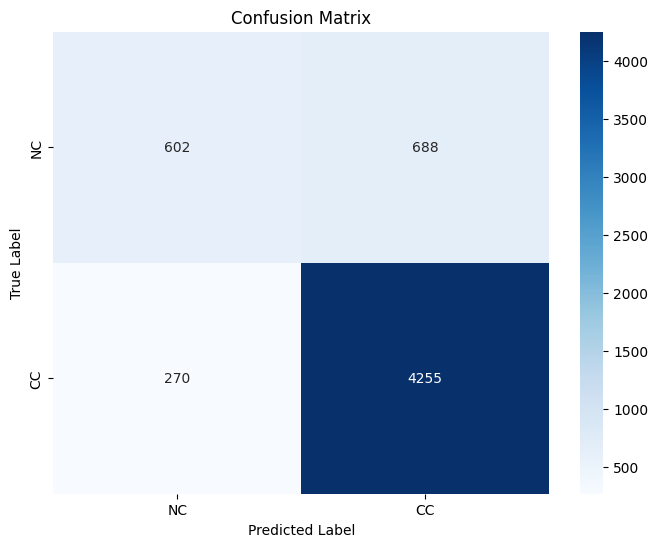

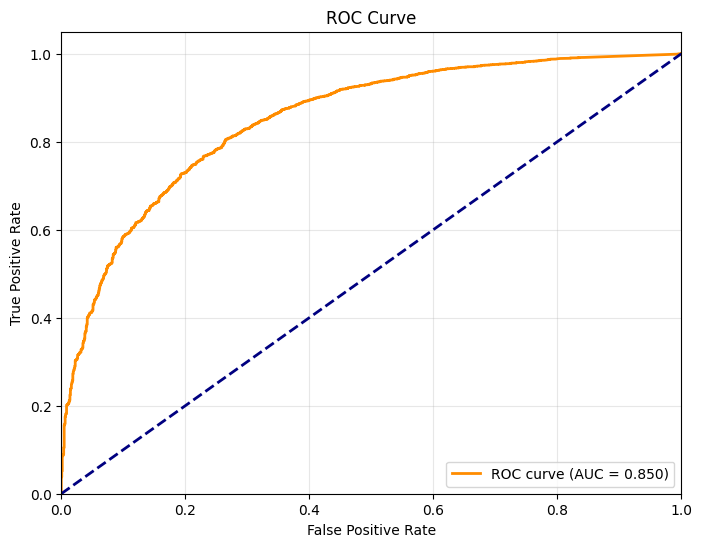

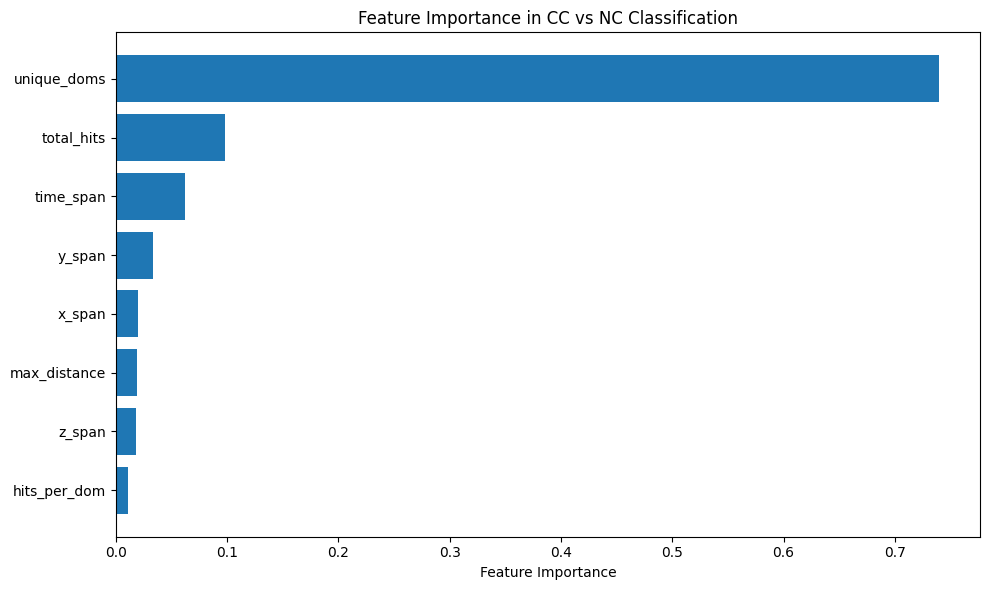

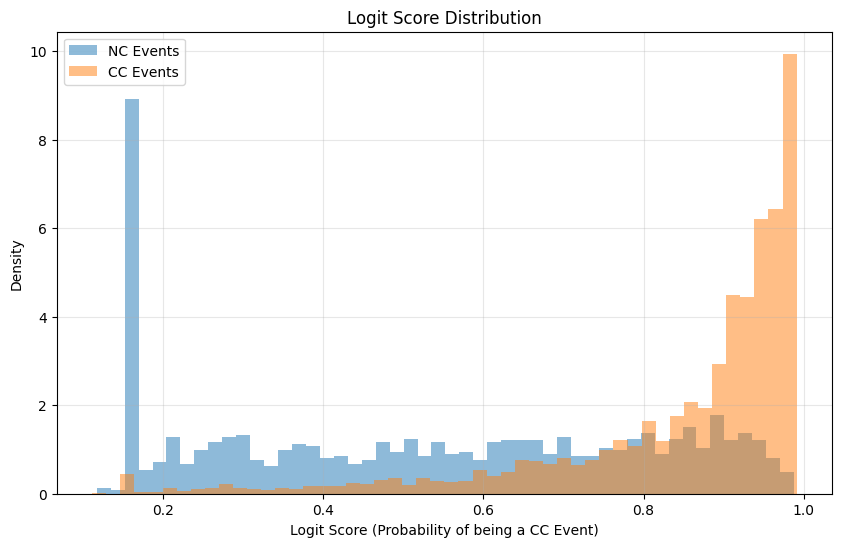


Optimal classification threshold: 0.7565
At this threshold - True Positive Rate: 0.8055, False Positive Rate: 0.2651
Precision at optimal threshold: 0.9142


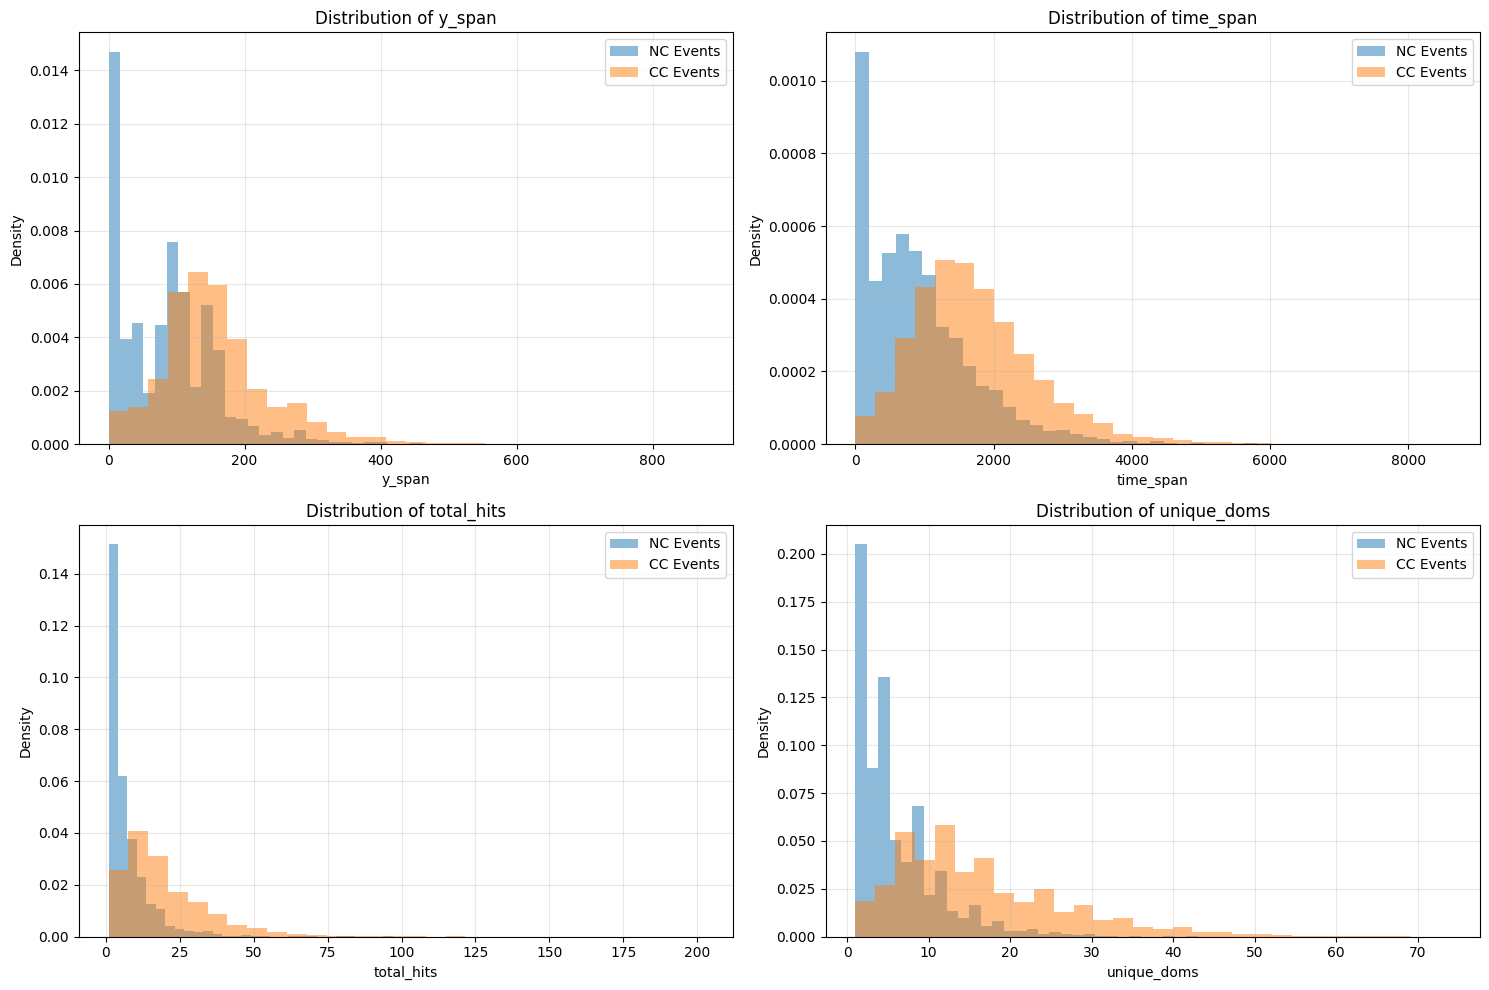

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_curve, auc, confusion_matrix)
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Directory containing your files
data_dir = "output/"

# Use two files
sim_files = [
    "10000_events_simset_1600_seed_1000_20250516_112519.parquet",
    "10000_events_simset_1601_seed_1001_20250516_112659.parquet"
]

# Function to extract event-level features
def extract_event_features(event_data):
    try:
        # Get interaction type (1 for CC, 2 for NC)
        interaction_type = event_data['mc_truth']['interaction']
        
        # Label: 1 for CC, 0 for NC
        label = 1 if interaction_type == 1 else 0
        
        # Get photon data
        photons = event_data['photons']
        
        # Skip events with no hits
        if len(photons['t']) == 0:
            return None
        
        # Basic features
        total_hits = len(photons['t'])
        string_ids = photons['string_id']
        sensor_ids = photons['sensor_id']
        unique_doms = len(set(zip(string_ids, sensor_ids)))
        
        # Spatial features
        pos_x = photons['sensor_pos_x']
        pos_y = photons['sensor_pos_y']
        pos_z = photons['sensor_pos_z']
        
        # Calculate maximum distance between any two hit DOMs
        positions = np.vstack((pos_x, pos_y, pos_z)).T
        max_distance = 0
        if len(positions) > 1:
            from scipy.spatial.distance import pdist
            max_distance = np.max(pdist(positions))
        
        # Calculate spatial extent
        x_span = np.max(pos_x) - np.min(pos_x)
        y_span = np.max(pos_y) - np.min(pos_y)
        z_span = np.max(pos_z) - np.min(pos_z)
        
        # Timing features
        hit_times = photons['t']
        time_span = np.max(hit_times) - np.min(hit_times)
        
        # Feature set
        features = {
            'total_hits': total_hits,
            'unique_doms': unique_doms,
            'max_distance': max_distance,
            'hits_per_dom': total_hits / max(1, unique_doms),
            'x_span': x_span,
            'y_span': y_span,
            'z_span': z_span,
            'time_span': time_span,
            'label': label
        }
        
        return features
    except Exception as e:
        print(f"Error extracting features: {e}")
        return None

# List to collect features from all files
all_features = []

# Process each file
for sim_file in sim_files:
    file_path = os.path.join(data_dir, sim_file)
    print(f"\nProcessing {sim_file}...")
    
    # Load the file
    df = pd.read_parquet(file_path)
    print(f"Loaded {len(df)} events")
    
    # Get CC and NC events
    cc_count = 0
    nc_count = 0
    for i, (idx, row) in enumerate(df.iterrows()):
        if row['mc_truth']['interaction'] == 1:
            cc_count += 1
        else:
            nc_count += 1
    
    print(f"File contains {cc_count} CC events and {nc_count} NC events")
    
    # Extract features from all events
    file_features = []
    for i, (idx, event_data) in enumerate(df.iterrows()):
        if i % 1000 == 0:  # Progress update
            print(f"Processing event {i}/{len(df)}...")
        
        features = extract_event_features(event_data)
        if features is not None:
            # Add a source file identifier
            features['file_source'] = sim_file
            file_features.append(features)
    
    print(f"Extracted features for {len(file_features)} events from {sim_file}")
    all_features.extend(file_features)

# Convert to DataFrame
features_df = pd.DataFrame(all_features)
print(f"\nCombined dataset has {len(features_df)} events")

# Check class balance
cc_count = sum(features_df['label'] == 1)
nc_count = sum(features_df['label'] == 0)
print(f"Class balance: {cc_count} CC events ({cc_count/len(features_df)*100:.1f}%), {nc_count} NC events ({nc_count/len(features_df)*100:.1f}%)")

# Check distribution by source file
print("\nEvents by source file:")
print(features_df['file_source'].value_counts())

# Remove file_source column for modeling
X = features_df.drop(['label', 'file_source'], axis=1)
y = features_df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set: {X_train.shape[0]} events, Test set: {X_test.shape[0]} events")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the BDT
print("\nTraining BDT classifier...")
bdt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

bdt.fit(X_train_scaled, y_train)

# Make predictions
y_pred = bdt.predict(X_test_scaled)
y_prob = bdt.predict_proba(X_test_scaled)[:, 1]  # Probability of being CC

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['NC', 'CC'], yticklabels=['NC', 'CC'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
feature_importance = bdt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in CC vs NC Classification')
plt.tight_layout()
plt.show()

# Logit score distribution
plt.figure(figsize=(10, 6))
plt.hist(y_prob[y_test == 0], bins=50, alpha=0.5, label='NC Events', density=True)
plt.hist(y_prob[y_test == 1], bins=50, alpha=0.5, label='CC Events', density=True)
plt.xlabel('Logit Score (Probability of being a CC Event)')
plt.ylabel('Density')
plt.title('Logit Score Distribution')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Find optimal threshold
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal classification threshold: {optimal_threshold:.4f}")
print(f"At this threshold - True Positive Rate: {tpr[optimal_idx]:.4f}, False Positive Rate: {fpr[optimal_idx]:.4f}")

# Calculate precision at threshold
precision_at_threshold = precision_score(y_test, y_prob >= optimal_threshold)
print(f"Precision at optimal threshold: {precision_at_threshold:.4f}")

# Plot distribution of important features by event type
plt.figure(figsize=(15, 10))

# Get top 4 most important features
top_features = [X.columns[i] for i in sorted_idx[-4:]]

for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i+1)
    plt.hist(features_df[features_df['label'] == 0][feature], bins=30, alpha=0.5, 
             label='NC Events', density=True)
    plt.hist(features_df[features_df['label'] == 1][feature], bins=30, alpha=0.5, 
             label='CC Events', density=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [1]:
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import os

# Directory containing your files
data_dir = "output/"

# Load just one parquet file
sim_file = "10000_events_simset_1600_seed_1000_20250516_112519.parquet"
file_path = os.path.join(data_dir, sim_file)

print(f"Loading {sim_file}...")
df = pd.read_parquet(file_path)
print(f"Loaded {len(df)} events")

# Identify CC events
cc_indices = []
for i, (idx, row) in enumerate(df.iterrows()):
    if row['mc_truth']['interaction'] == 1:  # CC event
        cc_indices.append(idx)

print(f"Found {len(cc_indices)} CC events")

# Take 5 CC events for detailed analysis
sample_indices = cc_indices[:5]
print(f"Analyzing 5 sample CC events: {sample_indices}")


Loading 10000_events_simset_1600_seed_1000_20250516_112519.parquet...
Loaded 10000 events
Found 7601 CC events
Analyzing 5 sample CC events: [1, 2, 6, 7, 8]


In [4]:
sample_indices

[1, 2, 6, 7, 8]

In [7]:
df['mc_truth'][1]

{'interaction': 1,
 'initial_state_energy': 10.412313629498133,
 'initial_state_type': 14,
 'initial_state_zenith': 2.2228167761664994,
 'initial_state_azimuth': -2.246417691825647,
 'initial_state_x': 34.74135612128542,
 'initial_state_y': -71.14454026723519,
 'initial_state_z': -2241.166533666538,
 'final_state_energy': array([0.00618   , 1.82880776, 0.01425271, 0.04126567, 0.05013999,
        1.49907176, 2.77971873, 0.14977499, 0.74668874, 1.14309946,
        0.98879449, 3.50068527, 0.54790024]),
 'final_state_type': array([  22.,   13.,   11.,   14.,  -12.,  111.,  211., -211.,  211.,
        2112., 2212., 2112.,  111.]),
 'final_state_zenith': array([0.62124409, 2.22719755, 1.38551193, 2.13226019, 1.17465952,
        2.20448571, 2.08847593, 2.41132929, 1.89208814, 0.68114385,
        2.07168354, 2.23851894, 1.8479452 ]),
 'final_state_azimuth': array([-2.65196604, -2.71049909,  1.47899129,  2.21695426, -1.12969056,
        -2.37875206, -2.20622458,  2.78360473, -1.89090016,  1.092

In [8]:
df['mc_truth'][2]

{'interaction': 1,
 'initial_state_energy': 36.62401661531793,
 'initial_state_type': 14,
 'initial_state_zenith': 1.5252590387360656,
 'initial_state_azimuth': 0.8672717653467816,
 'initial_state_x': 58.880897843324426,
 'initial_state_y': -65.05675995832735,
 'initial_state_z': -2231.1083806751094,
 'final_state_energy': array([3.52017115e+01, 3.43107317e-02, 2.65982178e-02, 4.47494251e-02,
        1.07733968e+00, 7.02163928e-01, 5.81073537e-01]),
 'final_state_type': array([  13.,   11.,   14.,  -12., 2112.,  211.,  211.]),
 'final_state_zenith': array([1.53959772, 0.75664507, 2.14756015, 1.8063036 , 1.41354894,
        1.76240109, 1.33952806]),
 'final_state_azimuth': array([ 0.86667764,  2.98851151,  2.34755082, -0.46447034,  1.06264854,
         1.34473229,  1.10440903]),
 'final_state_x': array([ 58.88089784, 126.72489654, 126.72489654, 126.72489654,
         58.88089784,  58.88089784,  58.88089784]),
 'final_state_y': array([-65.05675996,  14.82045234,  14.82045234,  14.8204523

In [13]:
df['mc_truth'][7]

{'interaction': 1,
 'initial_state_energy': 13.85663970078576,
 'initial_state_type': 14,
 'initial_state_zenith': 2.278600081635529,
 'initial_state_azimuth': -0.9869924532914569,
 'initial_state_x': 133.29301581605876,
 'initial_state_y': 3.266023194562641,
 'initial_state_z': -2401.793017684803,
 'final_state_energy': array([0.00673   , 6.23755857, 0.04233308, 0.03203108, 0.03129421,
        0.44773886, 0.14043565, 1.56631416, 1.02745661, 0.58990219,
        0.40081235, 2.06678583, 2.5290145 , 0.59770157, 1.07648112]),
 'final_state_type': array([  22.,   13.,   11.,   14.,  -12.,  111.,  111., -211., 2212.,
         211., -211.,  111., 2212.,  211., 2112.]),
 'final_state_zenith': array([1.76051571, 2.26941074, 1.65547231, 1.31916755, 1.7117068 ,
        2.08541394, 0.67843001, 2.23332892, 2.0751869 , 2.21590608,
        2.2875535 , 2.22341069, 2.25391005, 1.01730758, 2.12967453]),
 'final_state_azimuth': array([-1.2355312 , -0.97976417, -2.10426089,  1.85939232,  0.2139392 ,
     

In [14]:
import pandas as pd
import numpy as np
import os

# Directory containing your files
data_dir = "output/"

# Load just one parquet file to start
sim_file = "10000_events_simset_1600_seed_1000_20250516_112519.parquet"
file_path = os.path.join(data_dir, sim_file)

print(f"Loading {sim_file}...")
df = pd.read_parquet(file_path)
print(f"Loaded {len(df)} events")

# Identify CC events
cc_indices = []
for i, (idx, row) in enumerate(df.iterrows()):
    if row['mc_truth']['interaction'] == 1:  # CC event
        cc_indices.append(idx)

print(f"Found {len(cc_indices)} CC events")

# Analyze muon positions in final_state_type
muon_positions = []
muon_energies = []
neutrino_energies = []
inelasticities = []
multiple_muon_events = 0
no_muon_events = 0

for i, event_idx in enumerate(cc_indices):
    if i % 100 == 0:  # Progress update for large datasets
        print(f"Processing event {i}/{len(cc_indices)}...")
    
    event_data = df.iloc[event_idx]['mc_truth']
    
    # Get final state particles
    final_state_particles = event_data['final_state_type']
    
    # Find muon positions (PDG code 13)
    muon_indices = np.where(np.abs(final_state_particles) == 13)[0]
    
    # Get neutrino energy
    neutrino_energy = event_data['initial_state_energy']
    
    if len(muon_indices) == 0:
        no_muon_events += 1
        continue
    
    if len(muon_indices) > 1:
        multiple_muon_events += 1
    
    # Record position of first muon
    first_muon_pos = muon_indices[0]
    muon_positions.append(first_muon_pos)
    
    # Get energy of first muon (if available)
    if 'final_state_energy' in event_data:
        muon_energy = event_data['final_state_energy'][first_muon_pos]
        muon_energies.append(muon_energy)
        
        # Calculate inelasticity
        inelasticity = 1.0 - (muon_energy / neutrino_energy)
        inelasticities.append(inelasticity)
        
        neutrino_energies.append(neutrino_energy)


Loading 10000_events_simset_1600_seed_1000_20250516_112519.parquet...
Loaded 10000 events
Found 7601 CC events
Processing event 0/7601...
Processing event 100/7601...
Processing event 200/7601...
Processing event 300/7601...
Processing event 400/7601...
Processing event 500/7601...
Processing event 600/7601...
Processing event 700/7601...
Processing event 800/7601...
Processing event 900/7601...
Processing event 1000/7601...
Processing event 1100/7601...
Processing event 1200/7601...
Processing event 1300/7601...
Processing event 1400/7601...
Processing event 1500/7601...
Processing event 1600/7601...
Processing event 1700/7601...
Processing event 1800/7601...
Processing event 1900/7601...
Processing event 2000/7601...
Processing event 2100/7601...
Processing event 2200/7601...
Processing event 2300/7601...
Processing event 2400/7601...
Processing event 2500/7601...
Processing event 2600/7601...
Processing event 2700/7601...
Processing event 2800/7601...
Processing event 2900/7601...
P

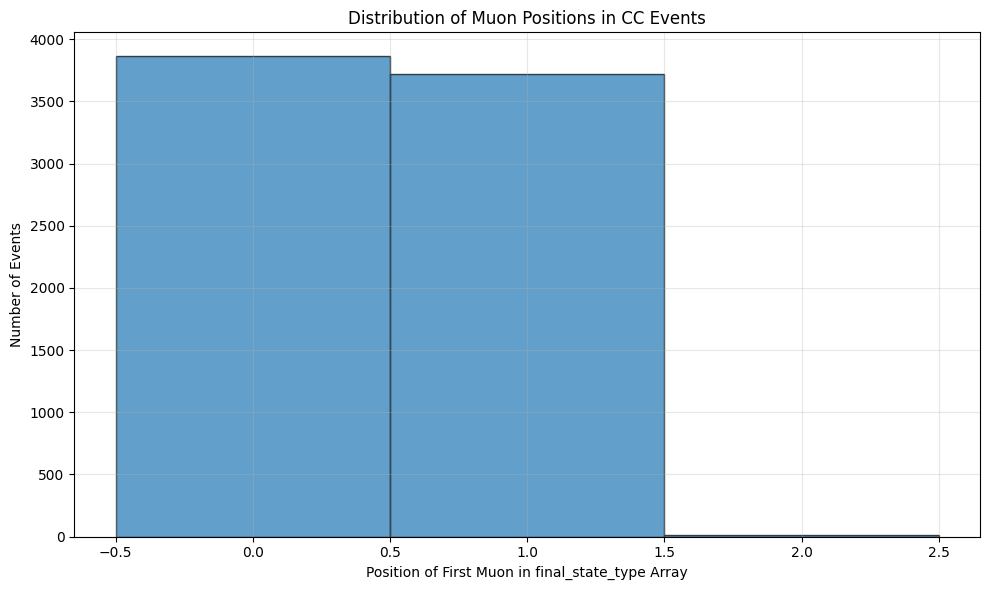


Summary Statistics:
Total CC events analyzed: 7601
Events with no muons: 0 (0.0%)
Events with multiple muons: 0 (0.0%)
Events with muon in position 0 or 1: 7586 (99.8%)


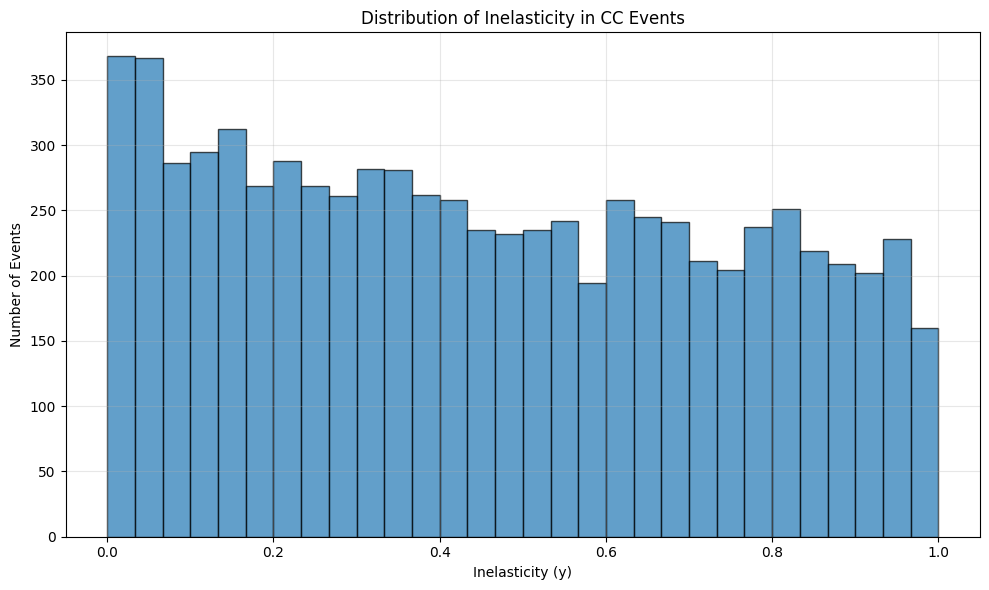


Inelasticity Statistics:
Mean inelasticity: 0.457
Median inelasticity: 0.434
Min inelasticity: 0.002
Max inelasticity: 0.997


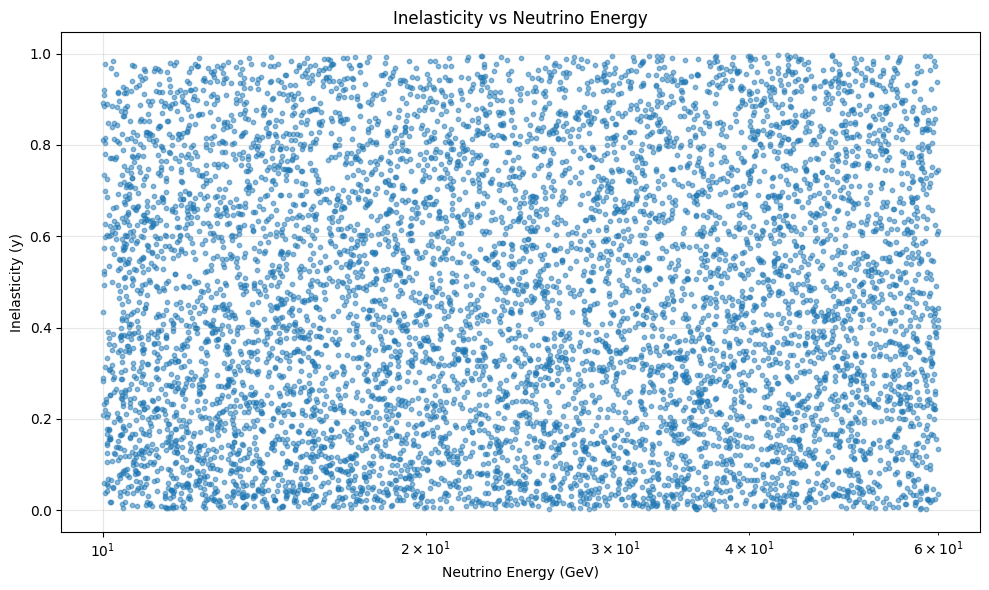

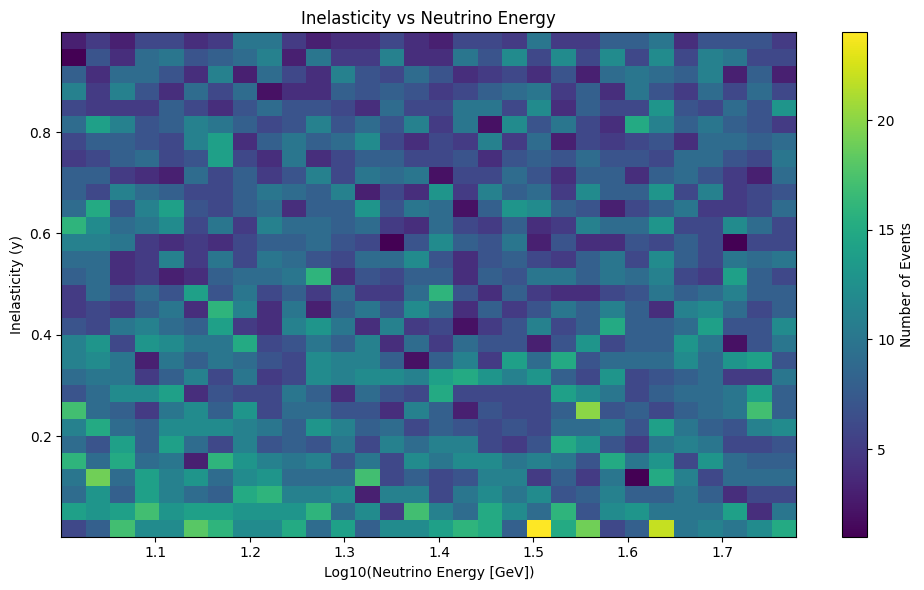

In [15]:

# Create a histogram of muon positions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(muon_positions, bins=np.arange(-0.5, max(muon_positions)+1.5, 1), 
         edgecolor='black', alpha=0.7)
plt.xlabel('Position of First Muon in final_state_type Array')
plt.ylabel('Number of Events')
plt.title('Distribution of Muon Positions in CC Events')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"Total CC events analyzed: {len(cc_indices)}")
print(f"Events with no muons: {no_muon_events} ({no_muon_events/len(cc_indices)*100:.1f}%)")
print(f"Events with multiple muons: {multiple_muon_events} ({multiple_muon_events/len(cc_indices)*100:.1f}%)")

# Count events where muon is in position 0 or 1
early_muons = sum(1 for pos in muon_positions if pos <= 1)
print(f"Events with muon in position 0 or 1: {early_muons} ({early_muons/len(muon_positions)*100:.1f}%)")

# If we have enough inelasticity values, plot their distribution
if inelasticities:
    plt.figure(figsize=(10, 6))
    plt.hist(inelasticities, bins=30, range=(0, 1), edgecolor='black', alpha=0.7)
    plt.xlabel('Inelasticity (y)')
    plt.ylabel('Number of Events')
    plt.title('Distribution of Inelasticity in CC Events')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print inelasticity statistics
    print(f"\nInelasticity Statistics:")
    print(f"Mean inelasticity: {np.mean(inelasticities):.3f}")
    print(f"Median inelasticity: {np.median(inelasticities):.3f}")
    print(f"Min inelasticity: {min(inelasticities):.3f}")
    print(f"Max inelasticity: {max(inelasticities):.3f}")
    
    # Also create a scatter plot of neutrino energy vs inelasticity
    plt.figure(figsize=(10, 6))
    plt.scatter(neutrino_energies, inelasticities, alpha=0.5, s=10)
    plt.xscale('log')
    plt.xlabel('Neutrino Energy (GeV)')
    plt.ylabel('Inelasticity (y)')
    plt.title('Inelasticity vs Neutrino Energy')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Create 2D histogram (heatmap) of energy vs inelasticity
    plt.figure(figsize=(10, 6))
    plt.hist2d(np.log10(neutrino_energies), inelasticities, bins=[30, 30], cmap='viridis')
    plt.colorbar(label='Number of Events')
    plt.xlabel('Log10(Neutrino Energy [GeV])')
    plt.ylabel('Inelasticity (y)')
    plt.title('Inelasticity vs Neutrino Energy')
    plt.tight_layout()
    plt.show()

In [19]:
cc_indices[np.argmax(muon_positions)]

590

In [22]:
df['mc_truth'][cc_indices[np.argmax(muon_positions)]]

{'interaction': 1,
 'initial_state_energy': 10.108024385591207,
 'initial_state_type': 14,
 'initial_state_zenith': 1.327775112308944,
 'initial_state_azimuth': 1.5579906827683518,
 'initial_state_x': 1.3778223381441705,
 'initial_state_y': -54.683800598872395,
 'initial_state_z': -2218.5218468633343,
 'final_state_energy': array([9.93000000e-03, 3.61000000e-03, 9.42676728e+00, 3.77094628e-02,
        4.33420285e-02, 2.46068833e-02, 1.07945943e+00, 5.26448358e-01]),
 'final_state_type': array([  22.,   22.,   13.,   11.,   14.,  -12., 2212.,  211.]),
 'final_state_zenith': array([1.95019045, 2.13681564, 1.34654096, 2.43891323, 0.56363031,
        1.89608748, 1.3980524 , 1.56143917]),
 'final_state_azimuth': array([-2.09303658,  2.66728597,  1.60969839,  1.81626286, -0.30087145,
        -2.33856455,  1.5316391 ,  0.78331233]),
 'final_state_x': array([ 1.37782234,  1.37782234,  1.37782234, -0.19806067, -0.19806067,
        -0.19806067,  1.37782234,  1.37782234]),
 'final_state_y': array

Loading 10000_events_simset_1600_seed_1000_20250516_112519.parquet...
Loaded 10000 events
Found 7601 CC events
Processing event 0/7601...
Processing event 100/7601...
Processing event 200/7601...
Processing event 300/7601...
Processing event 400/7601...
Processing event 500/7601...
Processing event 600/7601...
Processing event 700/7601...
Processing event 800/7601...
Processing event 900/7601...
Processing event 1000/7601...
Processing event 1100/7601...
Processing event 1200/7601...
Processing event 1300/7601...
Processing event 1400/7601...
Processing event 1500/7601...
Processing event 1600/7601...
Processing event 1700/7601...
Processing event 1800/7601...
Processing event 1900/7601...
Processing event 2000/7601...
Processing event 2100/7601...
Processing event 2200/7601...
Processing event 2300/7601...
Processing event 2400/7601...
Processing event 2500/7601...
Processing event 2600/7601...
Processing event 2700/7601...
Processing event 2800/7601...
Processing event 2900/7601...
P

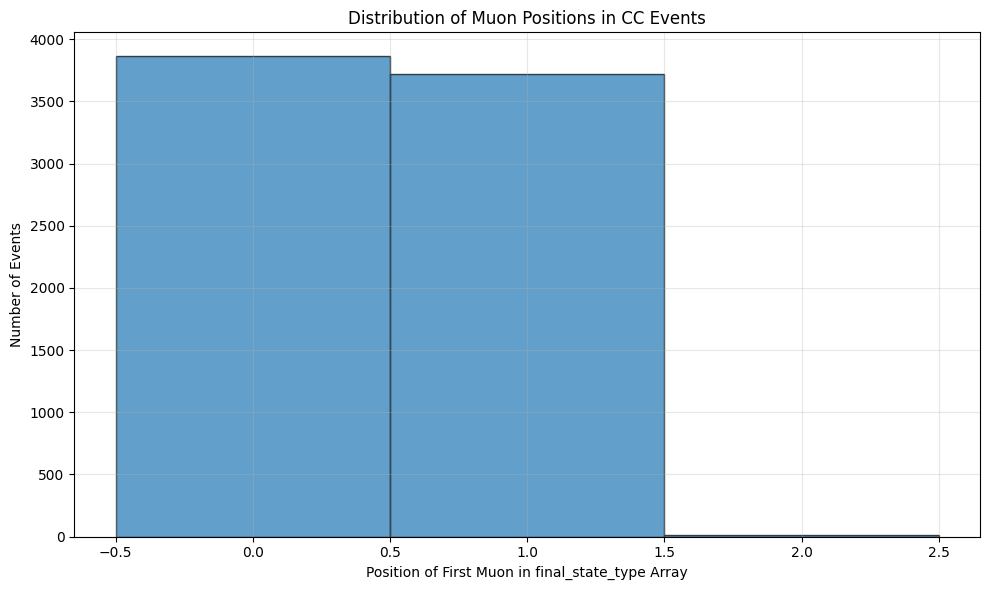


Events where muon is not in position 0 or 1: 15 (0.2%)
Events where photons (PDG 22) precede the muon: 3737 (49.2%)

Particles that precede muons:
  PDG 22.0: 3752 occurrences (49.4%)
  PDG 1000080160.0: 1 occurrences (0.0%)


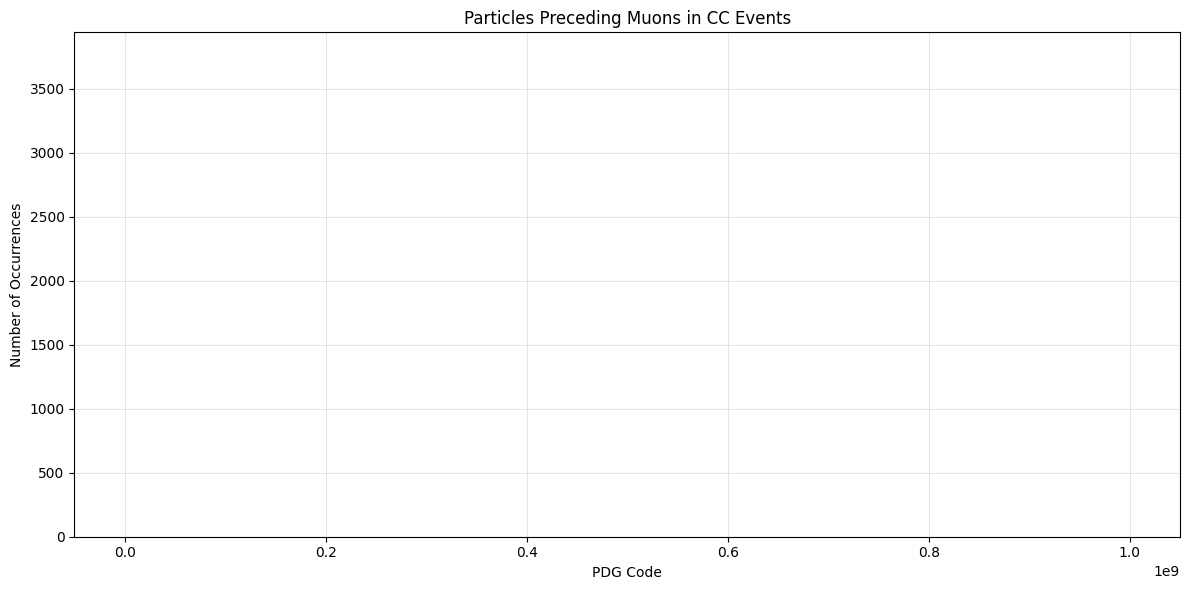


Detailed examination of events where muon is not in position 0 or 1:

Event 590:
  Final state particles: [  22.   22.   13.   11.   14.  -12. 2212.  211.]
  Final state parents: [0. 0. 0. 3. 3. 3. 0. 0.]
  Final state energies: [9.93000000e-03 3.61000000e-03 9.42676728e+00 3.77094628e-02
 4.33420285e-02 2.46068833e-02 1.07945943e+00 5.26448358e-01]

Event 947:
  Final state particles: [  22.   22.   13.   11.   14.  -12.  211. -211.  321. -211. 2112. 2212.
 -321. 2212.  211. -211.  211. 2112.  211. -211. -211.  211.]
  Final state parents: [0. 0. 0. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Final state energies: [9.93000000e-03 3.61000000e-03 1.69018277e+01 2.97101681e-02
 4.17404709e-02 3.42077355e-02 5.87299109e+00 9.01689356e+00
 4.21390374e+00 2.31459194e-01 1.13853567e+00 2.31664895e+00
 6.81897681e+00 1.19919007e+00 5.11891337e-01 1.43047695e-01
 7.50338627e-01 9.98718150e-01 4.02491480e-01 5.31985262e-01
 7.59017951e-01 1.95181658e+00]

Event 1443:
  Final st

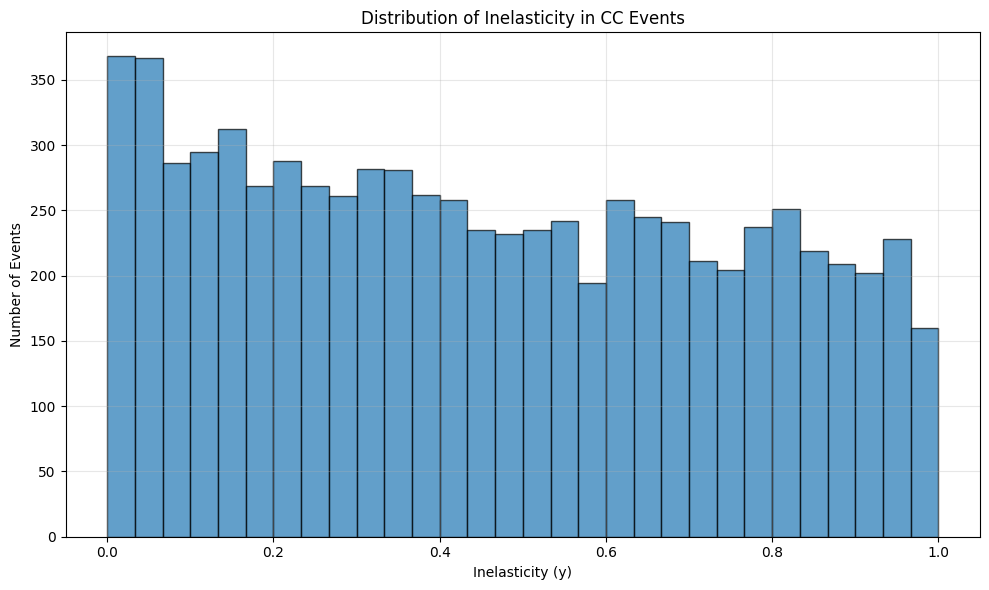


Inelasticity Statistics:
Mean inelasticity: 0.457
Median inelasticity: 0.434
Min inelasticity: 0.002
Max inelasticity: 0.997


In [23]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Directory containing your files
data_dir = "output/"

# Load just one parquet file to start
sim_file = "10000_events_simset_1600_seed_1000_20250516_112519.parquet"
file_path = os.path.join(data_dir, sim_file)

print(f"Loading {sim_file}...")
df = pd.read_parquet(file_path)
print(f"Loaded {len(df)} events")

# Identify CC events
cc_indices = []
for i, (idx, row) in enumerate(df.iterrows()):
    if row['mc_truth']['interaction'] == 1:  # CC event
        cc_indices.append(idx)

print(f"Found {len(cc_indices)} CC events")

# Analyze muon positions and particles that precede the muon
muon_positions = []
particles_before_muon = []  # Store PDG codes of particles before the first muon
neutrino_energies = []
muon_energies = []
inelasticities = []
no_muon_events = 0
multiple_muon_events = 0

for i, event_idx in enumerate(cc_indices):
    if i % 100 == 0:  # Progress update for large datasets
        print(f"Processing event {i}/{len(cc_indices)}...")
    
    event_data = df.iloc[event_idx]['mc_truth']
    
    # Get final state particles
    final_state_particles = event_data['final_state_type']
    
    # Find muon positions (PDG code 13)
    muon_indices = np.where(np.abs(final_state_particles) == 13)[0]
    
    if len(muon_indices) == 0:
        no_muon_events += 1
        continue
    
    if len(muon_indices) > 1:
        multiple_muon_events += 1
    
    # Record position of first muon
    first_muon_pos = muon_indices[0]
    muon_positions.append(first_muon_pos)
    
    # Record particles that come before the first muon
    if first_muon_pos > 0:
        pdg_codes_before = final_state_particles[:first_muon_pos]
        particles_before_muon.append(list(pdg_codes_before))
    else:
        particles_before_muon.append([])
    
    # Calculate inelasticity if energies are available
    if 'initial_state_energy' in event_data and 'final_state_energy' in event_data:
        neutrino_energy = event_data['initial_state_energy']
        muon_energy = event_data['final_state_energy'][first_muon_pos]
        
        neutrino_energies.append(neutrino_energy)
        muon_energies.append(muon_energy)
        
        inelasticity = 1.0 - (muon_energy / neutrino_energy)
        inelasticities.append(inelasticity)

# Create a histogram of muon positions
plt.figure(figsize=(10, 6))
plt.hist(muon_positions, bins=np.arange(-0.5, max(muon_positions)+1.5, 1), 
         edgecolor='black', alpha=0.7)
plt.xlabel('Position of First Muon in final_state_type Array')
plt.ylabel('Number of Events')
plt.title('Distribution of Muon Positions in CC Events')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Count and analyze events where muon is not first or second
late_muon_events = [i for i, pos in enumerate(muon_positions) if pos > 1]
print(f"\nEvents where muon is not in position 0 or 1: {len(late_muon_events)} ({len(late_muon_events)/len(muon_positions)*100:.1f}%)")

# Count events where photons (22) precede the muon
photon_preceded = sum(1 for particles in particles_before_muon if 22.0 in particles)
print(f"Events where photons (PDG 22) precede the muon: {photon_preceded} ({photon_preceded/len(particles_before_muon)*100:.1f}%)")

# Analyze what particles precede muons
if particles_before_muon:
    # Flatten the list of particles that come before muons
    all_preceding_particles = [p for sublist in particles_before_muon for p in sublist]
    
    # Count occurrence of each particle type
    particle_counts = {}
    for pdg in all_preceding_particles:
        particle_counts[pdg] = particle_counts.get(pdg, 0) + 1
    
    print("\nParticles that precede muons:")
    for pdg, count in sorted(particle_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"  PDG {pdg}: {count} occurrences ({count/len(particles_before_muon)*100:.1f}%)")
    
    # Create a histogram of particles before muon
    if all_preceding_particles:
        plt.figure(figsize=(12, 6))
        pdg_values, counts = np.unique(all_preceding_particles, return_counts=True)
        plt.bar(pdg_values, counts)
        plt.xlabel('PDG Code')
        plt.ylabel('Number of Occurrences')
        plt.title('Particles Preceding Muons in CC Events')
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

# Print detailed stats for events where muon is not in position 0 or 1
if late_muon_events:
    print("\nDetailed examination of events where muon is not in position 0 or 1:")
    for event_index in late_muon_events[:min(5, len(late_muon_events))]:  # Examine up to 5 such events
        original_idx = cc_indices[event_index]
        event_data = df.iloc[original_idx]['mc_truth']
        
        print(f"\nEvent {original_idx}:")
        print(f"  Final state particles: {event_data['final_state_type']}")
        if 'final_state_parent' in event_data:
            print(f"  Final state parents: {event_data['final_state_parent']}")
        if 'final_state_energy' in event_data:
            print(f"  Final state energies: {event_data['final_state_energy']}")
    
    # If there are more such events, indicate this
    if len(late_muon_events) > 5:
        print(f"\n... (plus {len(late_muon_events) - 5} more similar events)")

# Plot inelasticity distribution if available
if inelasticities:
    plt.figure(figsize=(10, 6))
    plt.hist(inelasticities, bins=30, range=(0, 1), edgecolor='black', alpha=0.7)
    plt.xlabel('Inelasticity (y)')
    plt.ylabel('Number of Events')
    plt.title('Distribution of Inelasticity in CC Events')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print inelasticity statistics
    print(f"\nInelasticity Statistics:")
    print(f"Mean inelasticity: {np.mean(inelasticities):.3f}")
    print(f"Median inelasticity: {np.median(inelasticities):.3f}")
    print(f"Min inelasticity: {min(inelasticities):.3f}")
    print(f"Max inelasticity: {max(inelasticities):.3f}")

KeyError: 'interaction'

In [26]:
# Find the event where PDG 1000080160.0 precedes the muon
event_idx = [cc_indices[i] for i, particles in enumerate(particles_before_muon) if any(p == 1000080160.0 for p in particles)][0]
print(f"Event with PDG 1000080160.0 preceding muon:\n{df.iloc[event_idx]['mc_truth']}")

Event with PDG 1000080160.0 preceding muon:
{'interaction': 1, 'initial_state_energy': 21.97643988991254, 'initial_state_type': 14, 'initial_state_zenith': 2.43811860129496, 'initial_state_azimuth': -1.2229462561261883, 'initial_state_x': 93.05845134209413, 'initial_state_y': -62.981233522665065, 'initial_state_z': -2159.499544573402, 'final_state_energy': array([1.48950805e+01, 1.93508648e+01, 1.16239151e-02, 4.35503070e-02,
       5.04841524e-02, 2.62608612e+00]), 'final_state_type': array([ 1.00008016e+09,  1.30000000e+01,  1.10000000e+01,  1.40000000e+01,
       -1.20000000e+01,  1.20000000e+01]), 'final_state_zenith': array([       nan, 2.43800814, 1.92740436, 1.23939086, 1.77254396,
       2.43726021]), 'final_state_azimuth': array([        nan, -1.22286982, -1.03529168, -1.82336235,  1.47486055,
       -1.22257255]), 'final_state_x': array([ 93.05845134,  93.05845134, 110.0267917 , 110.0267917 ,
       110.0267917 ,  93.05845134]), 'final_state_y': array([ -62.98123352,  -62.981

In [27]:
# Check the primary set file that corresponds to this event
primary_file = f"genie_events_primary_new_test_simset_1600_nevents_10000_seed_1000.parquet"
primary_path = os.path.join(data_dir, primary_file)
if os.path.exists(primary_path):
    primary_df = pd.read_parquet(primary_path)
    # Assuming the same event index applies to the primary set
    print(f"Primary set info for event {event_idx}:")
    print(primary_df.iloc[event_idx]['custom_info'] if 'custom_info' in primary_df.columns else "No custom_info column")
else:
    print(f"Primary file not found: {primary_path}")

Primary set info for event 2641:
nu:14;tgt:1000080160;proc:Weak[CC],IMD;


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [30]:

# Directory containing your files
data_dir = "output/"

# Load just one parquet file to start - for simplicity
sim_file = "10000_events_simset_1600_seed_1000_20250516_112519.parquet"
file_path = os.path.join(data_dir, sim_file)

print(f"Loading {sim_file}...")
df = pd.read_parquet(file_path)
print(f"Loaded {len(df)} events")

# Function to calculate inelasticity
def calculate_inelasticity(event_data):
    """Calculate inelasticity for a CC event"""
    try:
        # Get neutrino energy from mc_truth
        neutrino_energy = event_data['mc_truth']['initial_state_energy']
        
        # Get final state particles
        final_state_particles = event_data['mc_truth']['final_state_type']
        final_state_energies = event_data['mc_truth']['final_state_energy']
        
        # Find muon (PDG code 13)
        muon_indices = np.where(np.abs(final_state_particles) == 13)[0]
        
        # If no muons, return None
        if len(muon_indices) == 0:
            return None
        
        # Get first muon energy (assuming primary muon is first)
        muon_energy = final_state_energies[muon_indices[0]]
        
        # Calculate inelasticity: y = 1 - Eμ/Eν
        inelasticity = 1.0 - (muon_energy / neutrino_energy)
        
        # Check if inelasticity is physically meaningful
        if 0 <= inelasticity <= 1:
            return inelasticity
        else:
            return None
    except Exception as e:
        return None

# Function to extract event features for regression
def extract_event_features(event_data, include_inelasticity=True):
    """Extract features for inelasticity prediction"""
    try:
        # Only process CC events
        if event_data['mc_truth']['interaction'] != 1:  # Not a CC event
            return None
        
        # Calculate inelasticity if requested
        inelasticity = calculate_inelasticity(event_data) if include_inelasticity else None
        
        # Skip events where inelasticity can't be calculated
        if include_inelasticity and inelasticity is None:
            return None
        
        # Get photon data
        photons = event_data['photons']
        
        # Skip events with no hits
        if len(photons['t']) == 0:
            return None
        
        # Basic features
        total_hits = len(photons['t'])
        string_ids = photons['string_id']
        sensor_ids = photons['sensor_id']
        unique_doms = len(set(zip(string_ids, sensor_ids)))
        
        # Skip events with too few hits
        if unique_doms < 2:
            return None
        
        # Spatial features
        pos_x = photons['sensor_pos_x']
        pos_y = photons['sensor_pos_y']
        pos_z = photons['sensor_pos_z']
        
        # Timing features
        hit_times = photons['t']
        
        # Calculate features
        # 1. Basic count features
        hits_per_dom = total_hits / unique_doms
        
        # 2. Spatial features
        max_distance = 0
        if len(pos_x) > 1:
            from scipy.spatial.distance import pdist
            positions = np.vstack((pos_x, pos_y, pos_z)).T
            max_distance = np.max(pdist(positions))
        
        # 3. Time features
        time_span = np.max(hit_times) - np.min(hit_times)
        time_mean = np.mean(hit_times)
        time_std = np.std(hit_times)
        
        # 4. Position features
        center_x = np.mean(pos_x)
        center_y = np.mean(pos_y)
        center_z = np.mean(pos_z)
        
        # Calculate distances from center
        r_squared = (pos_x - center_x)**2 + (pos_y - center_y)**2 + (pos_z - center_z)**2
        r_mean = np.mean(np.sqrt(r_squared))
        
        # 5. Correlation features (if enough hits)
        time_z_corr = 0
        if len(hit_times) > 5:
            # Normalize position and time
            z_norm = (pos_z - center_z) / (np.std(pos_z) + 1e-6)
            t_norm = (hit_times - time_mean) / (np.std(hit_times) + 1e-6)
            time_z_corr = np.mean(z_norm * t_norm)
        
        # 6. Distribution features
        x_span = np.max(pos_x) - np.min(pos_x)
        y_span = np.max(pos_y) - np.min(pos_y)
        z_span = np.max(pos_z) - np.min(pos_z)
        
        # Feature dictionary
        features = {
            'total_hits': total_hits,
            'unique_doms': unique_doms,
            'hits_per_dom': hits_per_dom,
            'max_distance': max_distance,
            'time_span': time_span,
            'time_mean': time_mean,
            'time_std': time_std,
            'r_mean': r_mean,
            'time_z_corr': time_z_corr,
            'z_span': z_span,
            'x_span': x_span,
            'y_span': y_span,
            'center_z': center_z
        }
        
        # Add inelasticity if requested
        if include_inelasticity:
            features['inelasticity'] = inelasticity
        
        return features
    except Exception as e:
        return None

# Extract features for regression
print("Extracting features for CC events...")
all_features = []

for idx, row in df.iterrows():
    features = extract_event_features(row)
    if features is not None:
        all_features.append(features)

print(f"Extracted features for {len(all_features)} CC events with valid inelasticity")

# Convert to DataFrame
features_df = pd.DataFrame(all_features)

# Define features and target
X = features_df.drop('inelasticity', axis=1)
y = features_df['inelasticity']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set: {X_train.shape[0]} events, Test set: {X_test.shape[0]} events")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a simple linear model first
print("\nTraining linear regression model...")
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate linear model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Results:")
print(f"  Mean Squared Error: {mse_linear:.4f}")
print(f"  R-squared: {r2_linear:.4f}")
print(f"  Root Mean Squared Error: {np.sqrt(mse_linear):.4f}")


Loading 10000_events_simset_1600_seed_1000_20250516_112519.parquet...
Loaded 10000 events
Extracting features for CC events...
Extracted features for 7520 CC events with valid inelasticity
Training set: 5264 events, Test set: 2256 events

Training linear regression model...
Linear Regression Results:
  Mean Squared Error: 0.0698
  R-squared: 0.1892
  Root Mean Squared Error: 0.2642


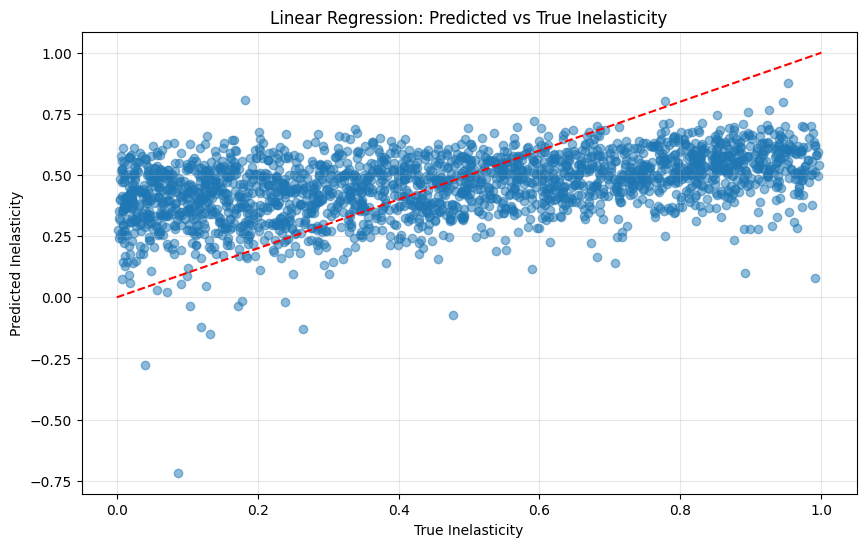


Training gradient boosting regressor...
Gradient Boosting Regressor Results:
  Mean Squared Error: 0.0661
  R-squared: 0.2320
  Root Mean Squared Error: 0.2571


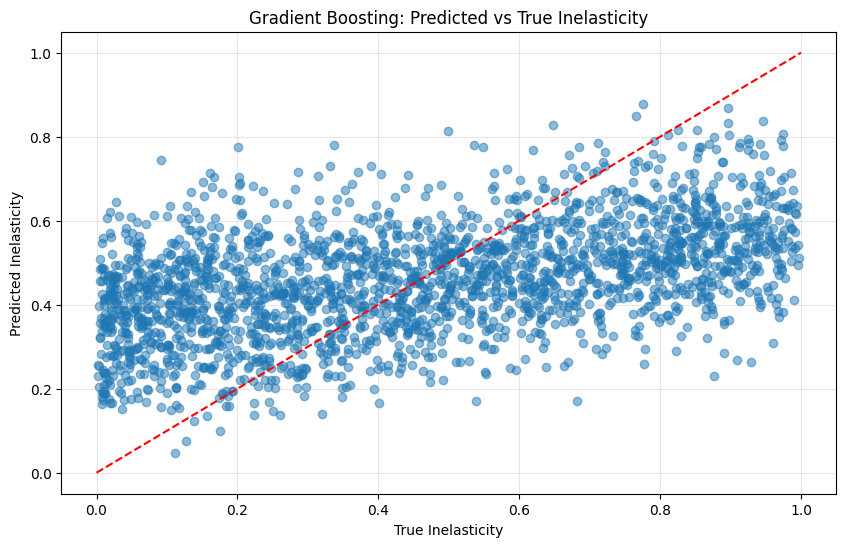

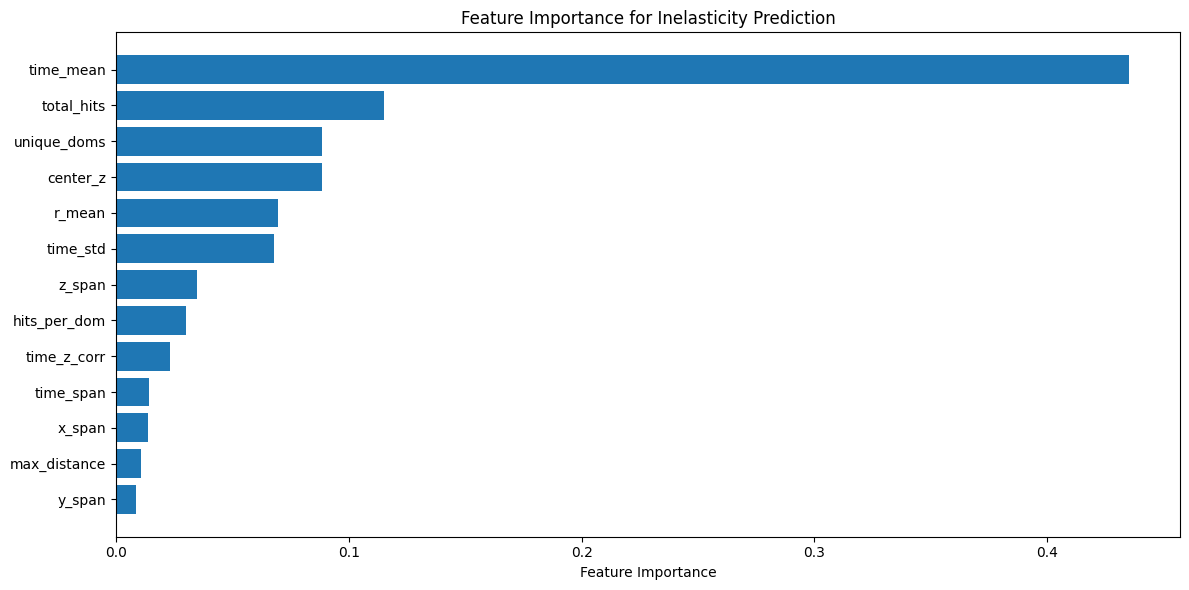


Top 4 features: ['center_z', 'unique_doms', 'total_hits', 'time_mean']
Simple Linear Model (Top 4 Features) Results:
  Mean Squared Error: 0.0729
  R-squared: 0.1533
  Root Mean Squared Error: 0.2700


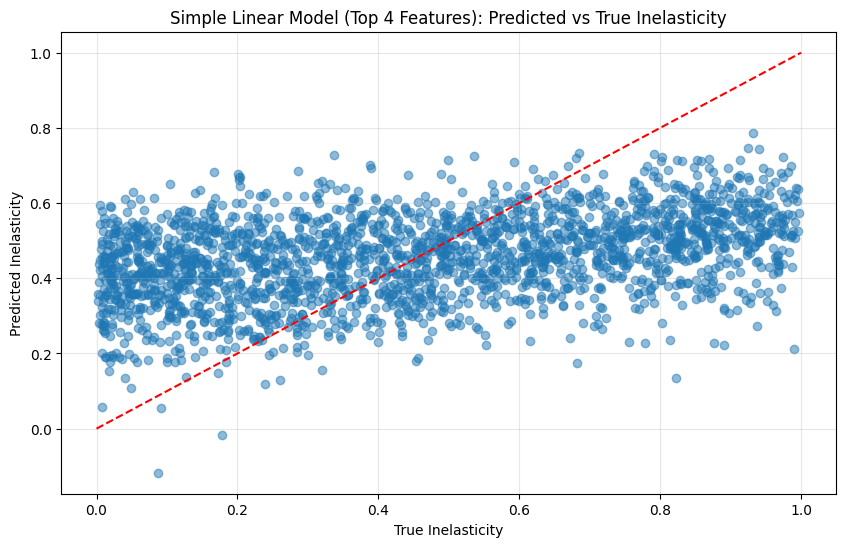


Simple Model Coefficients:
  center_z: 0.0193
  unique_doms: -0.0613
  total_hits: -0.0095
  time_mean: -0.0807
  Intercept: 0.4517


In [31]:

# Plot linear model predictions vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True Inelasticity')
plt.ylabel('Predicted Inelasticity')
plt.title('Linear Regression: Predicted vs True Inelasticity')
plt.grid(alpha=0.3)
plt.show()

# Train a gradient boosting regressor (better for complex relationships)
print("\nTraining gradient boosting regressor...")
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test_scaled)

# Evaluate GBR model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regressor Results:")
print(f"  Mean Squared Error: {mse_gbr:.4f}")
print(f"  R-squared: {r2_gbr:.4f}")
print(f"  Root Mean Squared Error: {np.sqrt(mse_gbr):.4f}")

# Plot GBR predictions vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True Inelasticity')
plt.ylabel('Predicted Inelasticity')
plt.title('Gradient Boosting: Predicted vs True Inelasticity')
plt.grid(alpha=0.3)
plt.show()

# Feature importance for GBR
plt.figure(figsize=(12, 6))
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Inelasticity Prediction')
plt.tight_layout()
plt.show()

# Now try a simple model using only the top few features
top_n_features = 4  # Use only top 4 features
top_features = [X.columns[i] for i in sorted_idx[-top_n_features:]]
print(f"\nTop {top_n_features} features: {top_features}")

# Train a linear model with just top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Scale these features
scaler_top = StandardScaler()
X_train_top_scaled = scaler_top.fit_transform(X_train_top)
X_test_top_scaled = scaler_top.transform(X_test_top)

# Train linear model with top features
simple_model = LinearRegression()
simple_model.fit(X_train_top_scaled, y_train)

# Make predictions
y_pred_simple = simple_model.predict(X_test_top_scaled)

# Evaluate simple model
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f"Simple Linear Model (Top {top_n_features} Features) Results:")
print(f"  Mean Squared Error: {mse_simple:.4f}")
print(f"  R-squared: {r2_simple:.4f}")
print(f"  Root Mean Squared Error: {np.sqrt(mse_simple):.4f}")

# Plot simple model predictions vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_simple, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True Inelasticity')
plt.ylabel('Predicted Inelasticity')
plt.title(f'Simple Linear Model (Top {top_n_features} Features): Predicted vs True Inelasticity')
plt.grid(alpha=0.3)
plt.show()

# Print coefficients of the simple model
print("\nSimple Model Coefficients:")
for feature, coef in zip(top_features, simple_model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"  Intercept: {simple_model.intercept_:.4f}")